# Assignment 3

## Instructions
- Run this notebook on ```Google Colab(preferable)```
- Write your code and analysis in the indicated cells.
- Ensure that this notebook runs without errors when the cells are run in sequence.
- Do not attempt to change the contents of other cells. 

## Packages Used
- Keras [link](https://keras.io/guides/)

## Submission
- Rename the notebook to `<roll_number>_Assignment3_Q1.ipynb`.

## Question 1

This question is based on seminal work by Zhang et al. The paper is titled 'Understanding deep learning requires rethinking generalization'. The paper talks about how the traditional methods fail to explain generalization of neural network. They show that a sufficiently parameterized network can easily fit a random labeling of the training data. This fitting cannot be curbed by explicit regularization.


## Q) 1.1 
Lets take a hello world dataset for ML algorithm the MNIST!
This question requires you to train a convolutional neural network.
Architecture: 4 layers of convolution with 64 filters in each layer. Keep activation map size same using padding.

In [ ]:
from tensorflow import keras   # feel free to use MNIST data from other sources 
import numpy as np
from tensorflow.keras.utils import to_categorical
from keras.callbacks import EarlyStopping
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D

from tensorflow.keras.optimizers import SGD
import random
import matplotlib.pyplot as plt


In [ ]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255

x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)

print("Train data shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")

Train data shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


#### One-hot-encode your labels here

In [ ]:
print ('label shape: ',np.shape(y_train),np.shape(y_test))
def encode(y):
    return to_categorical(y)

y_train = encode(y_train)
y_test = encode(y_test)
print ('label shape: ',np.shape(y_train),np.shape(y_test))

label shape:  (60000,) (10000,)
label shape:  (60000, 10) (10000, 10)


#### Define the model mentioned above
    1) Print the number of trainable parameters
     Use sgd optimizer with softmax at last layer 
     Train the model until convergence (use test data only for model selection and early stopping!)
    2) Report the train and test accuracy
    3) Plot the train and test accuracy and loss throughout the training

In [ ]:
#code here
def define_model():
  model = Sequential()
  # First Layer
  model.add(Conv2D(64, (3, 3), activation='relu',padding='same', input_shape=(28, 28, 1)))
  # model.add(MaxPooling2D((2, 2)))

  # Second Layer
  model.add(Conv2D(64, (3, 3), activation='relu',padding='same'))
  # model.add(MaxPooling2D((2, 2)))

  # Third Layer
  model.add(Conv2D(64, (3, 3), activation='relu',padding='same'))
  # model.add(MaxPooling2D((2, 2)))

  # Fourth Layer
  model.add(Conv2D(64, (3, 3), activation='relu',padding='same'))
  # model.add(MaxPooling2D((2, 2)))

  model.add(Flatten())
  model.add(Dense(1024, activation='relu'))

  model.add(Dense(10, activation='softmax'))
  
  opt = SGD(learning_rate=0.01, momentum=0.9)
  model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
  return model

In [ ]:
def train_model(model,x_train, y_train, x_test,y_test):
  es = EarlyStopping(monitor="val_accuracy",mode="auto",verbose=1,patience=3,restore_best_weights=True)
  history = model.fit(x_train, y_train,batch_size=32,validation_data=(x_test,y_test),epochs=10,callbacks=[es])
  # _, acc = model.evaluate(x_test,y_test)
  # print(acc)
  return model,history

In [ ]:
model = define_model()
model,history = train_model(model,x_train, y_train, x_test,y_test)

Epoch 1/10
1875/1875 [==============================] - 86s 40ms/step - loss: 0.1585 - accuracy: 0.9509 - val_loss: 0.0399 - val_accuracy: 0.9873
Epoch 2/10
1875/1875 [==============================] - 75s 40ms/step - loss: 0.0378 - accuracy: 0.9883 - val_loss: 0.0339 - val_accuracy: 0.9902
Epoch 3/10
1875/1875 [==============================] - 78s 41ms/step - loss: 0.0222 - accuracy: 0.9930 - val_loss: 0.0320 - val_accuracy: 0.9898
Epoch 4/10
1875/1875 [==============================] - 75s 40ms/step - loss: 0.0120 - accuracy: 0.9959 - val_loss: 0.0455 - val_accuracy: 0.9887
Epoch 5/10
1875/1875 [==============================] - 78s 41ms/step - loss: 0.0087 - accuracy: 0.9972 - val_loss: 0.0393 - val_accuracy: 0.9892
Epoch 5: early stopping


In [ ]:
loss, acc = model.evaluate(x_test,y_test)
print(acc)

313/313 [==============================] - 4s 12ms/step - loss: 0.0339 - accuracy: 0.9902
0.9901999831199646


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 64)        640       
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 64)        36928     
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 64)        36928     
                                                                 
 conv2d_3 (Conv2D)           (None, 28, 28, 64)        36928     
                                                                 
 flatten (Flatten)           (None, 50176)             0         
                                                                 
 dense (Dense)               (None, 1024)              51381248  
                                                                 
 dense_1 (Dense)             (None, 10)                1

In [ ]:
from IPython.core.pylabtools import figsize
def plot_history(history):
  fig, axs = plt.subplots(1, 2,figsize=(20,6))
  axs[0].plot(history.history['accuracy'], label='training accuracy')
  axs[0].plot(history.history['val_accuracy'], label='testing accuracy')
  axs[0].set_title('Accuracy')
  axs[0].set_xlabel('epochs')
  axs[0].set_ylabel('accuracy')
  axs[0].legend()
  # plt.show()

  # axs[0].subplot(1, 2, 2,figsize=(20,8))
  axs[1].plot(history.history['loss'], label='training loss')
  axs[1].plot(history.history['val_loss'], label='testing loss')
  axs[1].set_title('Loss')
  axs[1].set_xlabel('epochs')
  axs[1].set_ylabel('loss')
  axs[1].legend()
  # plt.tight_layout()
  plt.show()

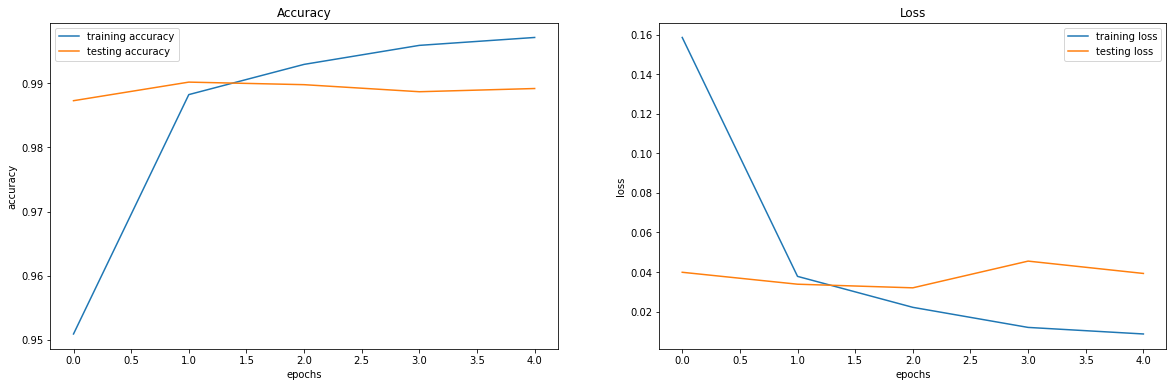

In [ ]:
plot_history(history)

## Q) 1.2
Now lets start adding label noise to the dataset


1) Randomize 20% of train labels and repeat Q1 (1,2 & 3)

2) Randomize 40% of train labels and repeat Q1 (3)

3) Randomize 60% of train labels and repeat Q1 (3)

4) Randomize 80% of train labels and repeat Q1 (3)

5) Randomize 100% of train labels and repeat Q1 (3)


In [ ]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255

x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)

print("Train data shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")
print ('label shape: ',np.shape(y_train),np.shape(y_test))


def encode(y):
    return to_categorical(y)

print ('label shape: ',np.shape(y_train),np.shape(y_test))
# y_train = encode(y_train)
y_test = encode(y_test)
print ('label shape: ',np.shape(y_train),np.shape(y_test))


Train data shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples
label shape:  (60000,) (10000,)
label shape:  (60000,) (10000,)
label shape:  (60000,) (10000, 10)


In [ ]:
type(y_train)

numpy.ndarray

In [ ]:
def randomize(rand_percent):
  randomlist = random.sample(range(0, y_train.shape[0]), int(rand_percent*y_train.shape[0]))
  y_train_noised = np.copy(y_train)
  for i in randomlist:
    y_train_noised[i] = random.randint(0,9)
  return y_train_noised


In [ ]:
def train_noisy_model(model,x, y, test_x, test_y):
  es = EarlyStopping(monitor="val_accuracy",mode="auto",verbose=1,patience=3,restore_best_weights=True)
  history = model.fit(x, y,batch_size=32,validation_data=(test_x,test_y),epochs=5,callbacks=[es])
  # _, acc = model.evaluate(x_test,y_test)
  # print(acc)
  return model,history

In [ ]:
y_train_20_noise = randomize(0.2)
y_train_20_noise = encode(y_train_20_noise)
print ('label shape: ',np.shape(y_train_20_noise),np.shape(y_test))

model_20_noise = define_model()
model_20_noise,history_20_noise = train_noisy_model(model_20_noise,x_train, y_train_20_noise, x_test,y_test)

label shape:  (60000, 10) (10000, 10)
Epoch 1/5
1875/1875 [==============================] - 78s 41ms/step - loss: 1.0517 - accuracy: 0.7749 - val_loss: 0.2514 - val_accuracy: 0.9821
Epoch 2/5
1875/1875 [==============================] - 76s 41ms/step - loss: 0.9415 - accuracy: 0.8055 - val_loss: 0.2417 - val_accuracy: 0.9851
Epoch 3/5
1875/1875 [==============================] - 78s 41ms/step - loss: 0.9095 - accuracy: 0.8101 - val_loss: 0.3275 - val_accuracy: 0.9819
Epoch 4/5
1875/1875 [==============================] - 75s 40ms/step - loss: 0.8749 - accuracy: 0.8120 - val_loss: 0.2625 - val_accuracy: 0.9856
Epoch 5/5
1875/1875 [==============================] - 76s 41ms/step - loss: 0.8225 - accuracy: 0.8144 - val_loss: 0.2428 - val_accuracy: 0.9798


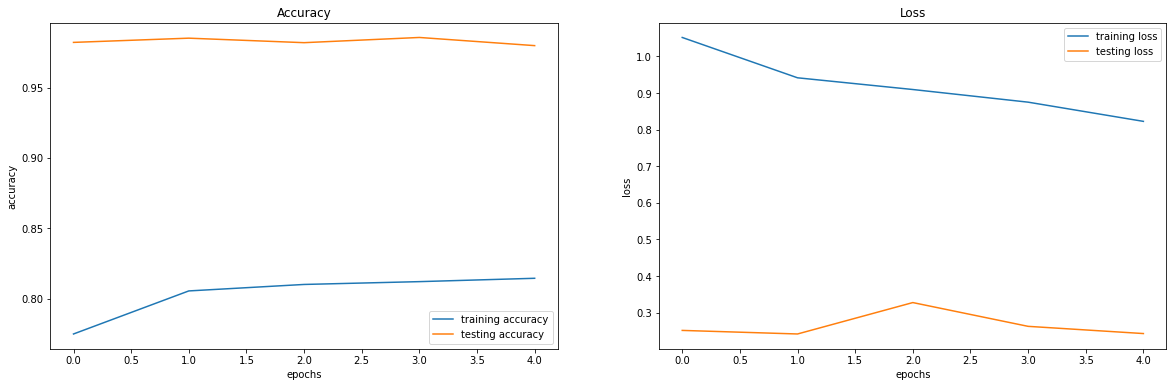

In [ ]:
plot_history(history_20_noise)

In [ ]:
y_train_40_noise = randomize(0.4)
y_train_40_noise = encode(y_train_40_noise)
print ('label shape: ',np.shape(y_train_40_noise),np.shape(y_test))

model_40_noise = define_model()
model_40_noise,history_40_noise = train_noisy_model(model_40_noise,x_train, y_train_40_noise, x_test,y_test)

label shape:  (60000, 10) (10000, 10)
Epoch 1/5
1875/1875 [==============================] - 76s 40ms/step - loss: 1.5999 - accuracy: 0.5963 - val_loss: 0.5573 - val_accuracy: 0.9719
Epoch 2/5
1875/1875 [==============================] - 77s 41ms/step - loss: 1.5100 - accuracy: 0.6255 - val_loss: 0.6196 - val_accuracy: 0.9819
Epoch 3/5
1875/1875 [==============================] - 76s 41ms/step - loss: 1.4794 - accuracy: 0.6294 - val_loss: 0.4680 - val_accuracy: 0.9824
Epoch 4/5
1875/1875 [==============================] - 75s 40ms/step - loss: 1.4465 - accuracy: 0.6314 - val_loss: 0.6585 - val_accuracy: 0.9821
Epoch 5/5
1875/1875 [==============================] - 75s 40ms/step - loss: 1.3941 - accuracy: 0.6342 - val_loss: 0.5845 - val_accuracy: 0.9750


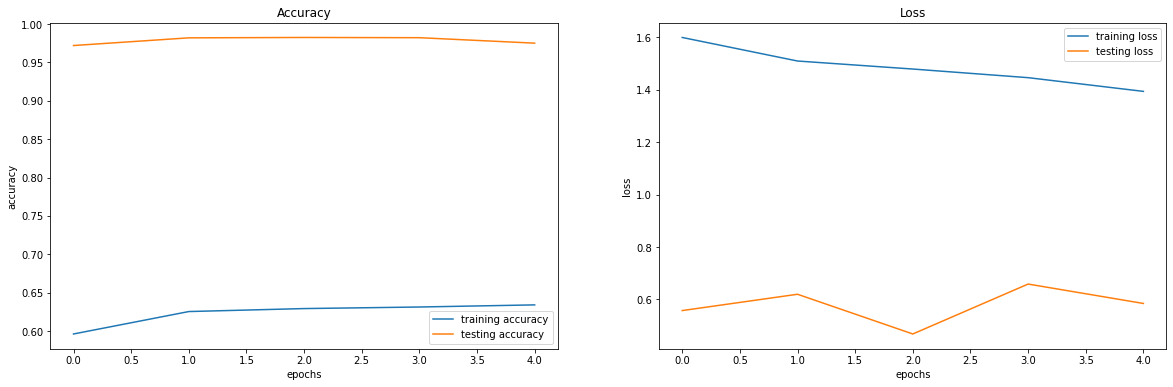

In [ ]:
plot_history(history_40_noise)

In [ ]:
y_train_60_noise = randomize(0.6)
y_train_60_noise = encode(y_train_60_noise)
print ('label shape: ',np.shape(y_train_60_noise),np.shape(y_test))

model_60_noise = define_model()
model_60_noise,history_60_noise = train_noisy_model(model_60_noise,x_train, y_train_60_noise, x_test,y_test)

label shape:  (60000, 10) (10000, 10)
Epoch 1/5
1875/1875 [==============================] - 77s 41ms/step - loss: 1.9874 - accuracy: 0.4175 - val_loss: 0.9025 - val_accuracy: 0.9667
Epoch 2/5
1875/1875 [==============================] - 75s 40ms/step - loss: 1.9225 - accuracy: 0.4461 - val_loss: 0.8944 - val_accuracy: 0.9702
Epoch 3/5
1875/1875 [==============================] - 76s 40ms/step - loss: 1.8979 - accuracy: 0.4498 - val_loss: 1.0031 - val_accuracy: 0.9719
Epoch 4/5
1875/1875 [==============================] - 75s 40ms/step - loss: 1.8694 - accuracy: 0.4519 - val_loss: 0.9474 - val_accuracy: 0.9778
Epoch 5/5
1875/1875 [==============================] - 77s 41ms/step - loss: 1.8174 - accuracy: 0.4553 - val_loss: 0.9274 - val_accuracy: 0.9600


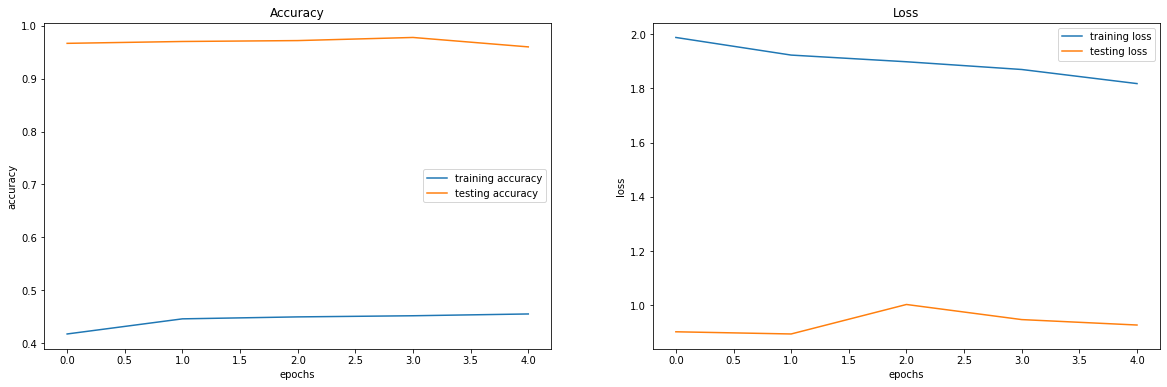

In [ ]:
plot_history(history_60_noise)

In [ ]:
y_train_80_noise = randomize(0.8)
y_train_80_noise = encode(y_train_80_noise)
print ('label shape: ',np.shape(y_train_80_noise),np.shape(y_test))

model_80_noise = define_model()
model_80_noise, history_80_noise = train_noisy_model(model_80_noise,x_train, y_train_80_noise, x_test,y_test)

label shape:  (60000, 10) (10000, 10)
Epoch 1/5
1875/1875 [==============================] - 78s 41ms/step - loss: 2.2308 - accuracy: 0.2419 - val_loss: 1.4478 - val_accuracy: 0.9352
Epoch 2/5
1875/1875 [==============================] - 77s 41ms/step - loss: 2.1972 - accuracy: 0.2671 - val_loss: 1.6046 - val_accuracy: 0.9486
Epoch 3/5
1875/1875 [==============================] - 75s 40ms/step - loss: 2.1807 - accuracy: 0.2703 - val_loss: 1.3663 - val_accuracy: 0.9455
Epoch 4/5
1875/1875 [==============================] - 75s 40ms/step - loss: 2.1591 - accuracy: 0.2725 - val_loss: 1.5395 - val_accuracy: 0.9279
Epoch 5/5
1875/1875 [==============================] - 75s 40ms/step - loss: 2.1141 - accuracy: 0.2804 - val_loss: 1.4724 - val_accuracy: 0.8621
Epoch 5: early stopping


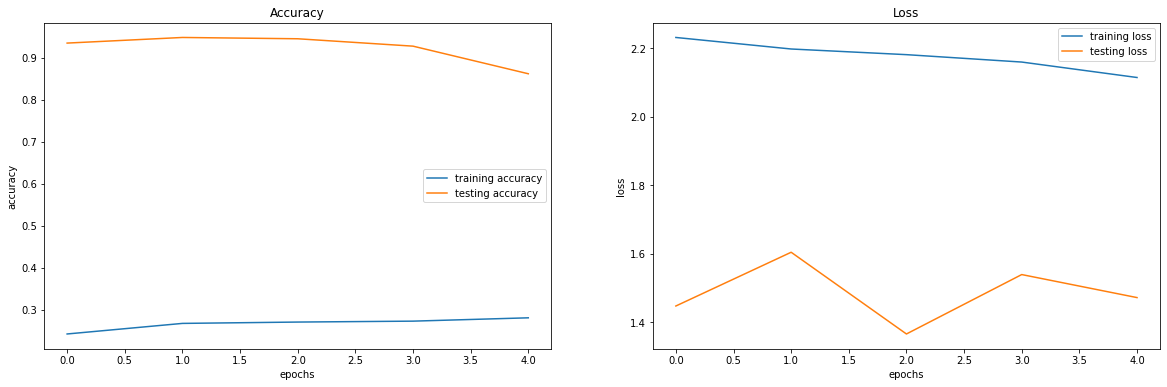

In [ ]:
plot_history(history_80_noise)

In [ ]:
y_train_100_noise = randomize(1)
y_train_100_noise = encode(y_train_100_noise)
print ('label shape: ',np.shape(y_train_100_noise),np.shape(y_test))

model_100_noise = define_model()
model_100_noise, history_100_noise = train_noisy_model(model_100_noise,x_train, y_train_100_noise, x_test,y_test)

label shape:  (60000, 10) (10000, 10)
Epoch 1/5
1875/1875 [==============================] - 78s 41ms/step - loss: 2.3034 - accuracy: 0.1026 - val_loss: 2.3042 - val_accuracy: 0.1009
Epoch 2/5
1875/1875 [==============================] - 76s 41ms/step - loss: 2.3033 - accuracy: 0.1015 - val_loss: 2.3031 - val_accuracy: 0.1009
Epoch 3/5
1875/1875 [==============================] - 76s 41ms/step - loss: 2.3033 - accuracy: 0.1011 - val_loss: 2.3033 - val_accuracy: 0.1009
Epoch 4/5
1875/1875 [==============================] - 75s 40ms/step - loss: 2.3033 - accuracy: 0.1006 - val_loss: 2.3024 - val_accuracy: 0.1028
Epoch 5/5
1875/1875 [==============================] - 77s 41ms/step - loss: 2.3033 - accuracy: 0.1041 - val_loss: 2.3026 - val_accuracy: 0.1051


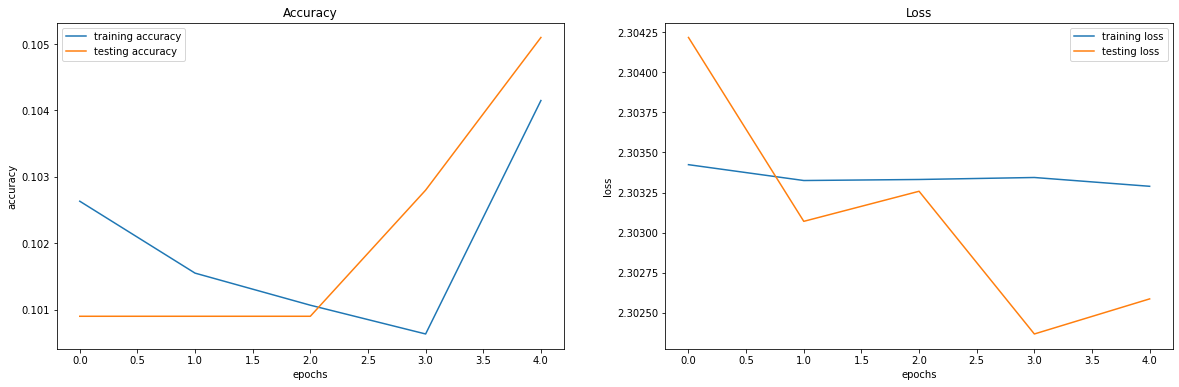

In [ ]:
plot_history(history_100_noise)